In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Binomially Distributed Data


Recall the binomial distribution describes data generated when we observe a binary outcome (one of two things can happen) a fixed number of times, and the probability that one or another thing happens for each individual outcome does not change.

In each of the following situations, the resulting data *may be* binomially distributed.

  - If it is binomially distributed, give the parameters of the binomial distribution.
  - If it is not binomially distributed, describe why not.  If you can, give the correct distribution (if not, don't worry too much about it).

#### 1. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground (without losing any) and count how many 4's you see.

The face showing on each die is independent from all the others, and there is a $\frac{1}{6}$ of the $4$ showing on each individual die.  So:

$$ P(\text{# 4's showing} = k) =\binom{1256}{k} \left( \frac{1}{6} \right)^k \left(\frac{5}{6} \right)^{1256 - k} $$

Which is a binomial probability.

#### 2. A large bucket contains 1256 dice with varying numbers of sides (some have 4 sides, some have six, some have 8, some have 10, some have 12, and some have 20).  You dump them all onto the ground (without losing any) and count how many 4's you see.

Even though all the die here are independently facing, the probabilities of showing a four on the various die are not all the same (for some it is $\frac{1}{6}$, for some it is \frac{1}{8}, etc...).

It woul be possible to compute this probabilit *if* we knew how many die of each type there were, but without this information all we can say is that it is *not* binomial.

#### 3.  A magic the gathering deck (like a deck of cards) is made up of two types of cards: lands, and playables.  You have a deck that contains the typical 17 lands.  You shuffle your deck, then draw the top cards and see if it is a land.  Then you repeat this process 100 times, and count how often there is a land on top.

Each time you re-shuffle the deck, the event that there is a lnad on top is independent from all other re-shuffles.  Each time there is a $\frac{17}{40}$ chance that the top card is a land.  So:

$$ P(\text{# of times land is on top} = k) = \binom{100}{k} \left( \frac{17}{40} \right)^k \left(\frac{23}{40} \right)^{40 - k} $$

#### 4. A magic the gathering deck is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, draw a hand of 7 cards, and count the number of lands.

You may be tempted to believe that this is binomially distributed according to the following reasoning: we have 7 cards, and each of them has a $\frac{17}{40}$ chance of being a land, so:

$$ P(\text{# of lands in opening hand} = k) = \binom{7}{k} \left( \frac{17}{40} \right)^k \left(\frac{23}{40} \right)^{40 - k} $$

But this is **wrong**!

The flaw in this reasoning is that, while the probability that the *first* card you draw is a land is indeed $\frac{17}{40}$, that is not true for the subsequent cards.  In fact, there is no single probability that can be assigned to second card being a land, because:

  - If the *first* card you draw is a land, then the probability the second card is a land is $\frac{16}{39}$.
  - If the *first* card you draw is *not* a land, then the probability the second card you draw is a land is $\frac{17}{49}$.
  
The distribution of the number of lands in your opening hand does have a name (but not a very good or memorable one), it's called the [Hypergeometric Distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution).  This distribution is well known to everyone playing card games at a high level.  Using the PDF of the hypergeometric distribution, the desired probability is:

$$ P(\text{# of lands in opening hand} = k) = \frac{ \binom{17}{k} \binom{40 - 17}{7 - k} }{ \binom{40}{7} } $$

#### 6. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground, but this time you lose a random number of dice; there is a 10% chance you will lose any individual die.  You, again, count the number of 4's. 

As mentioned, this one actually is binomially distributed, although it may not seem like it at first.

The easiest way to see this, conceptially, is to consider the "misingness" of a die as a new kind of face.  So where before each die had six faces, not each of them has seven:

$$ 1, 2, 3, 4, 5, 6, \text{missing} $$

Where, for any individual die, $P(\text{missing}) = 0.1$.

Given this information, we can calculate the probability that any individual die shows a four:

$$ \begin{align}
P(\text{die shows four}) &= P(\text{die is not missing and die shows a four}) \\ &= P(\text{die shows a four} \mid \text{die is not missing}) P(\text{die is not missing}) \\ &= \frac{1}{6} \times \frac{9}{10} \\ &= \frac{9}{60}
\end{align}$$

Note that this probability is the **same** for each die, and what happens to each die is independent of what happens to all the other dice.  Consequently, the number of fours is binomially distributed, and it's PMF is:

$$P(\text{# of dice showing a four}) = \binom{1256}{k} \left( \frac{9}{60} \right)^k \left(\frac{9}{60} \right)^{1256 - k} $$

#### 7.  A magic the gathering deck is made up of two types of cards: lands, and playables.  Although 17 lands is typical in a 40 card deck, it is sometimes correct to play 16 or 18 lands.  Say when you construct a deck, 80% of them contain 17 lands, 10% contain 16, and 10% contain 18.  You build a magic the gathering deck, shuffle it, and then look at the top card and see if it is a land.  You then repeat this process 100 times (including rebuilding the deck), and count how many times there was a land on top.

This is also binomially distributed, though not obviously so.

A good way to think about this is to imagine that each time you run the experiment you make three decks, one with 16 lands, one with 17, and one with 18.  Then you randomly choose a deck (with the perscribed probabilities), shuffle it, then draw to top card and check if it is a land.  It should feel intuitive that this situation is equivelant, but it may take a bit of thought to convince yourself of this.

Given this situation, we can break down the probability that there is a land on the top of the chosen deck:

$$\begin{alignat}{2}
P(\text{top card is a land}) \ &&= \ &&P(\text{top card is a land and 16 total lands}) \\
&& &&+ P(\text{top card is a land and 17 total lands}) \\
&& &&+ P(\text{top card is a land and 18 total lands}) \\
&&= \ &&P(\text{top card is a land} \mid \text{16 total lands}) P(\text{16 total lands}) \\
&& &&+ P(\text{top card is a land} \mid \text{17 total lands}) P(\text{17 total lands}) \\
&& &&+ P(\text{top card is a land} \mid \text{18 total lands}) P(\text{18 total lands}) \\
&&= \ &&\frac{16}{40} \frac{1}{10} + \frac{17}{40} \frac{8}{10} + \frac{18}{40} \frac{1}{10} \\
&&= \ && 0.425
\end{alignat}
$$

As in the previous problem, we see now that we get the same probability every time we run the experiment, and all the experiments are independent, so the number of times we see a land on top is binomially distributed:

$$ P(\text{# of times land is on top} = k) = \binom{100}{k} 0.425^k \ 0.575^{100 - k} $$

## Binomial Hypothesis Tests

We'll need access to the binomial CDF to do the p-value calculations in this part, the best way to get access to these is from scipy.

In [1]:
import scipy.stats as stats

#### 1. Muriel insists she can tell if you poured milk into tea before or after the hot water.  To prove her point, she goes to goodwill and purchases ALL of their mugs, 137 in total.  It take all day, but you manage to randomly make cups of tea milk or water first in all the mugs, and test her on all of them.  She gets 72 correct.  Do you believe her now?

Let's let $p = P(\text{Muriel gets a single cup correct})$.

Null Hypothesis: $p = 0.5$
Alternate Hypothesis: $p > 0.5$

Muriel attempts the experiment 137 times, and, under the null hypothesis, the probability that she gets any single, individual cup correct is 0.5.  Therefore the probability that muriel gets some number of cups correct is a Binomial probability:

$$ P(\text{Muriel gets k cups correct} \mid \text{Null Hypothesis}) = \binom{137}{k} 0.5^k \ 0.5^{137 - k} = \binom{137}{k} 0.5^{137} $$

In the experiment, muriel gets 72 cups correct, so the p-value for Fishers null hypothesis is:

$$ P(\text{Binom}(n=137, p=0.5) \geq 72) $$

which we can calculate with scipy:

In [9]:
p_value = 1 - stats.binom(n=137, p=0.5).cdf(72 - 1)
print(f"p-value: {p_value:.2f}")

p-value: 0.30


This is a rather large p-value, and would be insufficient evidence against the null for any resonable person.

#### 2. You are working on your heelflips (a skateboarding trick).  Your goal is to land them more than 50% of the time (as in, the true rate you land them is over one half. Of course, in any given sample, you may learn more or less than that ideal).   You attempt 122 heelflips in a day, and land 72 of them.  Do you believe you are as good as you want to be?

Let $p = P(\text{You land a kickflip}) $$.

Null Hypothesis: $p = 0.5$.
Alternate Hypothesis: $p > 0.5$.

$$ P(\text{Land k kickflips} \mid \text{Null Hypothesis}) = \binom{122}{72} 0.5^{122}$$

$$ \text{p-value} = P(\text{Binom}(n=122, p=0.5) \geq 72) $$

In [11]:
p_value = 1 - stats.binom(n=122, p=0.5).cdf(72 - 1)
print(f"p-value: {p_value:.2f}")

p-value: 0.03


This time, since we have accomplished the same number of successes in less attmempts compared to the last problem, our p-value is much smaller.  This is probably small enough for me to adopt the belief that I land kcikflips more than hald the time.

#### 3. Buses are seemingly always late, like 90% of them.  Thoroughly dismayed with the state of public transportation, you spend all day collecting data and being just generally upset.  Out of 53 total bus arrivals in a given day at your local bus stop, 49 of them were late.  Is the situation really that bad, 90% of them?

Let $p = P(\text{A bus is late})$.

Null Hypothesis: $p = 0.9$, Alternate Hypothesis: $p \geq 0.9$

$$ P(\text{k busses are late} \mid \text{Null Hypothesis}) = \binom{53}{49} 0.9^{k} \ 0.1^{53 - k} $$

$$ \text{p-value} = P(\text{Binom}(n=53, p=0.9) \geq 49) $$

In [13]:
p_value = 1 - stats.binom(n=53, p=0.9).cdf(49 - 1)
print(f"p-value: {p_value:.2f}")

p-value: 0.38


#### 4. You'd like to think that you are improving at programming, but most of your programs don't run at first.  Your instructors insist that this is normal, but it's discouraging, so you would like to have some measure of improvement.  At the beginning, none of your programs ran the first time, but this week you wrote 6 programs, and one of them ran the first time!  Can you confidently clam that more than 5% of your programs run the first time, you'd feel pretty good about that.

Let $p = P(\text{Program works the first time})$.

Null Hypothesis: $p = 0.05$, Alternate Hypothesis: $p \geq 0.05$

$$ P(\text{k programs work the first time} \mid \text{Null Hypothesis}) = \binom{6}{k} 0.05^{k} \ 0.95^{6-k} $$

$$ \text{p-value} = P(\text{Binom}(n=6, p=0.05) \geq 1) $$

In [14]:
p_value = 1 - stats.binom(n=6, p=0.05).cdf(0)
print(f"p-value: {p_value:.2f}")

p-value: 0.26


## Varying the Sample Size

1. Let's suppose that Muriel finds more (or less) mugs at the goodwill.  Write a function to encapsulate your work in problem 1 above.  It should take as parameters the number of mugs, and the number she got correct, and return a p-value under the null hypothesis that she is guessing randomly.

    ```python
    def binomial_test(n_mugs, n_correct, p_null=0.5):
    ```

In [16]:
def binomial_test(n_mugs, n_correct, p_null=0.5):
    p_value = 1 - stats.binom(n=n_mugs, p=p_null).cdf(n_correct - 1)
    return p_value

2. Use your function to replicate your conclusion from above.

In [17]:
p_value = binomial_test(137, 72)
print(f"p-value: {p_value:.2f}")

p-value: 0.30


3. Suppose the *truth* is that Muriel gets 52% of the mugs correct.  Vary the number of mugs total between 1 and 2500, and in each case assume that the number Muriel gets correct is `0.52 * n_mugs` (which isn't an integer, but do something sensible to make it one).  Plot the p-value of a binomial test on this data as the number of mugs used varies.

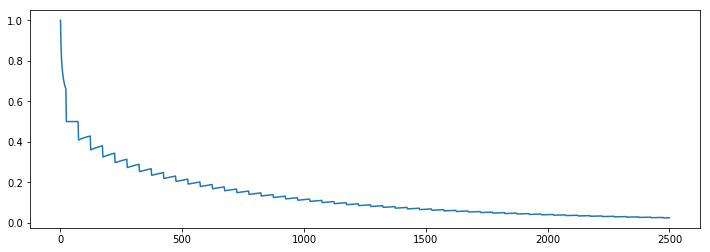

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from math import floor

fig, ax = plt.subplots(figsize=(12, 4))

# Just do the odd points, so we don't have to deal with the middle number issue 
# with the binomial cdf.
ns = np.arange(1, 2500, 2)
p_values = [binomial_test(n, floor(0.52*n)) for n in ns]
ax.plot(ns, p_values)

4. How many mugs would we need to achieve a p-value of `< 0.2`, of `< 0.1`, of `< 0.05`?

In [43]:
def n_mugs_for_p_value(p_value):
    ns = np.arange(1, 2500)
    p_values = np.array([binomial_test(n, floor(0.52*n)) for n in ns])
    return np.argmax(p_values <= p_value)

In [44]:
n_mugs_for_p_value(0.2)

499

In [46]:
n_mugs_for_p_value(0.1)

1099

In [45]:
n_mugs_for_p_value(0.05)

1749